## Task: Train an EMNIST classifier

EMNIST (or extended MNIST) is just like MNIST, a bunch of handwritten images, except instead of just digits (0-9) it also has uppercase and lowercase characters.

You are provided with the code to load the EMNIST train and split **datasets**

Write and train a classifier for EMNIST. Make sure to

- Show how your loss(es) dropped during training.
- Show final performance of your model on test data.
- Maintain good code quality.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install torch torchvision
%pip install matplotlib

clear_output()

In [ ]:
import torch
import torch.nn as nn

from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = EMNIST(root='emnist_data/', split='byclass', download=True, transform=to_tensor) # transform to tensor and divide by 255
test_data = EMNIST(root='emnist_data/', split='byclass', download=True, train=False, transform=to_tensor) # transform to tensor

100%|██████████| 561753746/561753746 [00:29<00:00, 19051221.59it/s]


Extracting emnist_data/EMNIST/raw/gzip.zip to emnist_data/EMNIST/raw


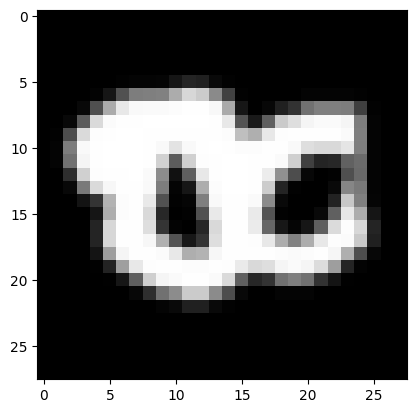

In [ ]:
plt.imshow(train_data[511][0][0].numpy(), cmap="gray")

In [ ]:
len(train_data), train_data[0][0].shape

(697932, torch.Size([1, 28, 28]))

In [ ]:
train_data[0][1]

35

**Manual Implementation**

In [ ]:
batch_size = 64

train_loader = DataLoader(train_data, batch_size = batch_size)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle=False)

**Initialize weights**

In [ ]:
ni = 28*28 # number of features per sample(pixels of image)
nh = 50 # number of neurons
no = 62 # no. of classes

W1 = np.random.randn(nh, ni) # -> (50,784)
b1 = np.zeros((nh, 1))

W2 = np.random.randn(no, nh)
b2 = np.zeros((no, 1))

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def softmax(y_pred):
  return np.exp(y_pred)/np.sum(np.exp(y_pred),axis=0,keepDims=True) # y_pred is going to be dimensions(# of test samples, # of classes)

def crossentropy(y, y_pred):
  return np.mean(np.sum(-y*np.log(y_pred), axis = 0))

In [ ]:
epochs = 15
lr = 1e-3

In [ ]:
training_loses = []

for i_epoch in range(epochs):

  for X, labels in train_loader:
    X = X.numpy().reshape(-1, 28*28).T # X -> (784, 64) where 64 is the batch size not the number of classes
    labels.numpy()

    y = np.zeros((no, X.shape[1]))
    y[labels, np.arange(X.shape[1])] = 1

    # forward pass
    z1 = W1@X + b1
    A1 = sigmoid(z1)

    z2 = W2@A1 + b2
    y_hat = sigmoid(z2)

    # backward pass
    dz2 = y_hat - y
    dw2 = dz2 @ A1.T
    db2 = np.sum(dz2, axis=1, keepdims=True)

    dz1 = W2.T @ dz2 * A1 * (1 - A1)
    dw1 = dz1 @ X.T
    db1 = np.sum(dz1, axis=1, keepdims=True)

    # update
    W2 -= lr * dw2
    b2 -= lr * db2

    W1 -= lr * dw1
    b1 -= lr * db1

    y_pred = np.argmax(y_hat, axis = 0)

    loss = crossentropy(y, y_hat)

  training_loses.append(loss)
  print(f"Epoch: {i_epoch}, loss= {loss}")





Epoch: 0, loss= 1.3083878131592566
Epoch: 1, loss= 1.029763119638446
Epoch: 2, loss= 0.8480471890307726
Epoch: 3, loss= 0.7569439366262238
Epoch: 4, loss= 0.7274313135683047
Epoch: 5, loss= 0.7112122811720298
Epoch: 6, loss= 0.6936587304942109
Epoch: 7, loss= 0.692690858243077
Epoch: 8, loss= 0.7038641048381207
Epoch: 9, loss= 0.7131824954332214
Epoch: 10, loss= 0.71612373741416
Epoch: 11, loss= 0.7168023259741503
Epoch: 12, loss= 0.7186995939670885
Epoch: 13, loss= 0.7265982851804789
Epoch: 14, loss= 0.7417870572754662


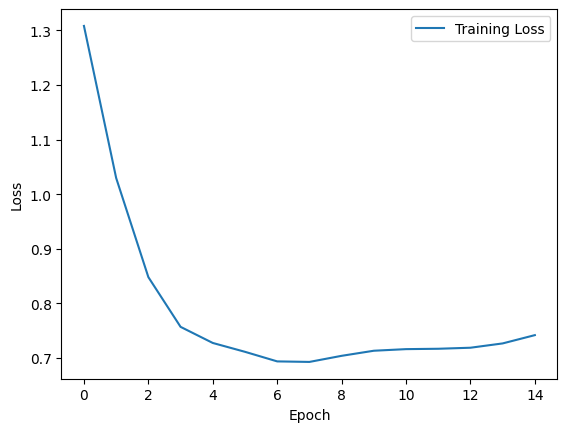

In [ ]:
epochs = range(len(training_loses))
plt.plot(epochs, training_loses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
correct = 0

for X, labels in test_loader:
  X = X.numpy().reshape(-1, 28*28).T
  labels = labels.numpy()

  y = np.zeros((no, X.shape[1]))
  #print(y.shape)
  y[labels, np.arange(X.shape[1])] = 1

  Z1 = W1@X + b1
  A1 = sigmoid(Z1)

  Z2 = W2@A1 + b2
  A2 = sigmoid(Z2)

  y_pred = np.argmax(A2, axis=0)
  #print(f'A2 shape {A2.shape} , and prediction shape : {y_pred.shape}')
  correct += np.sum(labels == y_pred)

accuracy = correct / len(test_data)
accuracy

0.7105731454656431

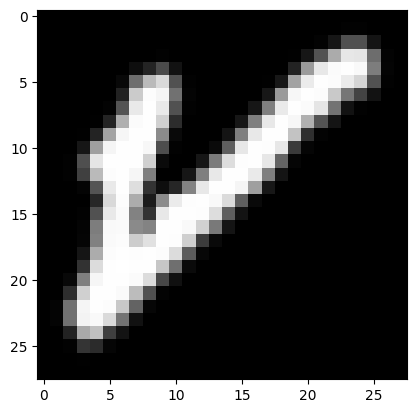

In [ ]:
plt.imshow(X[:,30].reshape(28,28), cmap="gray")

In [ ]:
A2[:, 1]

array([8.05851463e-04, 1.17670122e-03, 1.51125910e-03, 3.56054993e-03,
       8.28632715e-05, 1.98245383e-02, 8.52873234e-06, 1.42091654e-01,
       8.62145912e-05, 4.18541848e-03, 3.23284823e-05, 2.31656872e-05,
       7.73597975e-05, 1.24573210e-04, 7.90392126e-07, 1.20753450e-06,
       5.48811146e-04, 1.49883514e-05, 7.59123322e-04, 1.83026522e-03,
       7.00806054e-07, 3.85763202e-07, 1.07929640e-05, 4.11986559e-05,
       1.78920193e-04, 2.84016291e-06, 5.21561585e-04, 1.43036106e-06,
       9.42819681e-02, 4.53404562e-06, 2.00659134e-03, 5.51141079e-04,
       4.76685336e-07, 5.89203314e-05, 8.38399991e-04, 2.31348543e-05,
       7.19891468e-04, 3.64093250e-06, 2.42690241e-05, 5.93191853e-07,
       3.17680809e-07, 8.05155319e-06, 1.61075764e-02, 1.08717840e-04,
       3.09258350e-04, 4.57321121e-03, 3.49654825e-07, 1.50722092e-04,
       4.67157873e-07, 4.26601754e-05, 1.84449833e-04, 1.02581158e-05,
       2.35309158e-03, 1.22420820e-08, 3.31869010e-02, 9.54858092e-06,
      

**PyTorch implementation**

**Two hidden layers**

In [ ]:
import torch
import torch.nn as nn

from torchvision.datasets import EMNIST
import torchvision.transforms.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms.functional import to_tensor
from torch.optim import Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Simple vanilla NN with two linear layers and sigmoid as activation function
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__() # Need to define super constructor as is inheritting from nn class

    # Calling constructor of nn.Module to initialise the nn.Module of our Net class
    self.layer1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.layer2 = nn.Linear(in_features=hidden_size, out_features=output_size)

  # This function needs to be called forward. Defines forward pass of network
  def forward(self, x):
    # First layer
    # Pass x as input: linear + non_linear
    x1 = self.layer1(x)
    x2 = nn.functional.relu(x1)

    x3 = self.layer2(x2)

    return x3

In [ ]:
# Initialize instance of custom Net class
# Input 28*28 pixels(flattened to 784-dimensional vector), 50 neurons for hidden layer, output of 62 classes
model = Net(28*28, 250, 62)

# Check if gpu is available to use cuda
device = "cuda" if torch.cuda.is_available() else "cpu"

# Pass model to gpu
model.to(device)

# Initialize Adam optimizer
optimizer = Adam(model.parameters(), lr=1e-4)
# Initialize loss function to be used(logSoftMax is included, hence it's not declared explicitly)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 15
train_loss = []
model.train()

for i in range(num_epochs):
  epoch_loss = []
  for x,y in train_loader:
    x = x.view(-1,28*28).to(device)
    y = y.to(device)

    # Forward pass
    out = model(x)

    # Calculate loss
    loss = criterion(out, y)

    # Zero previous gradients
    optimizer.zero_grad()
    # Backward pass
    loss.backward()
    # Update weights
    optimizer.step()

    epoch_loss.append(loss.item())

  train_loss.append(np.mean(epoch_loss))
  print(f"Epoch {i}: Loss:{train_loss[-1]}")

Epoch 0: Loss:1.1375352551352096
Epoch 1: Loss:0.7400400900696475
Epoch 2: Loss:0.6264199478042447
Epoch 3: Loss:0.5716281201879672
Epoch 4: Loss:0.5382390107290692
Epoch 5: Loss:0.515226579334962
Epoch 6: Loss:0.4981245258541232
Epoch 7: Loss:0.48484361775912166
Epoch 8: Loss:0.4741490825207304
Epoch 9: Loss:0.4652671520682774
Epoch 10: Loss:0.4577348345469471
Epoch 11: Loss:0.45119249904738334
Epoch 12: Loss:0.4454756852573437
Epoch 13: Loss:0.44040232770146304
Epoch 14: Loss:0.4358566908888941


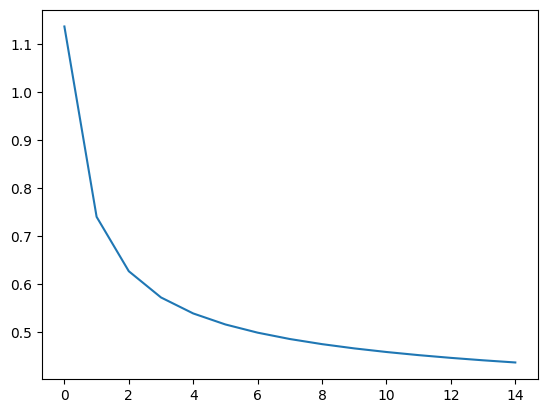

In [ ]:
plt.plot(train_loss)

In [ ]:
model.eval()
correct = 0
with torch.no_grad():
  for x,y in test_loader:
    x = x.view(-1,28*28).to(device)
    y = y.numpy()

    out = model(x).cpu().numpy()  # Forward pass

    preds = np.argmax(out, axis=-1)

    correct += np.sum(preds==y)

accuracy = (correct/len(test_data))*100
print(f"Accuracy: {accuracy}")

Accuracy: 84.43987861385969


**Increasing the number of neurons from 50 to 70 and keeping the same number of hidden layers increased the accuracy of the model from 77.5% to 81.4%. Then a further increase in the number of neurons from 70 to 100 increased the accuracy to 82.5%. Further increase to 150 neurons gives a 83.5% accuracy. For 200 neurons in the hiiden layer an accuracy of 84% was achieved.**

In [ ]:
y

array([15,  7, 38,  4,  5,  4, 32, 19,  2,  2, 30, 20, 40, 40, 51,  4, 13,
        8, 12, 28, 28, 28, 23, 40,  5, 30, 13, 40,  3,  8,  7, 55, 28,  0,
        5])

In [ ]:
preds

array([15,  7, 12,  4,  5,  4, 32, 19,  2,  2, 30, 46, 40, 40, 51,  4, 13,
        8, 12, 28, 28, 28, 23, 40,  5, 30, 13, 40,  3,  8,  7, 55, 28, 24,
        5])

In [ ]:
np.sum(preds == y)

32

**CNN approach**

**Three convolutional layers**

In [ ]:
class OurCNN(nn.Module):
  def __init__(self):
    super().__init__()

    # out_channels= # of feature maps to be learned or # of features
    self.conv_layer_1 = nn.Conv2d(in_channels=1, out_channels=140, kernel_size=3, padding=1)
    self.conv_layer_2 = nn.Conv2d(in_channels=140, out_channels=120, kernel_size=3, padding=1)
    self.conv_layer_3 = nn.Conv2d(in_channels=120, out_channels=64, kernel_size=3, padding=1)

    # Polling layer conceptually used to reduce spatial dimensions of feature maps and introduce translational variance
    self.pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

    self.linear_layer_1 = nn.Linear(in_features=64*3*3, out_features=100)
    self.linear_layer_2 = nn.Linear(in_features=100, out_features=62)

  def forward(self, x): # x -> (B, C, H, W)
    x = self.pool_layer(nn.functional.relu(self.conv_layer_1(x)))
    x = self.pool_layer(nn.functional.relu(self.conv_layer_2(x)))
    x = self.pool_layer(nn.functional.relu(self.conv_layer_3(x)))

    x = x.flatten(start_dim=1)

    x = nn.functional.relu(self.linear_layer_1(x))
    x = self.linear_layer_2(x)
    # x = torch.softmax(x, dim=-1)

    return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = OurCNN().to(device)

In [ ]:
optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10

epoch_training_loss = []

for i in range(num_epochs):
  batch_losses = 0
  for x,y in train_loader:
    x = x.to(device)
    y = y.to(device)

    out = model(x)

    loss = criterion(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batch_losses += loss.item()

  epoch_training_loss.append(batch_losses/len(train_loader))
  print(f"Epoch: {i}, training_loss: {epoch_training_loss[-1]}")

Epoch: 0, training_loss: 0.49013197573416606


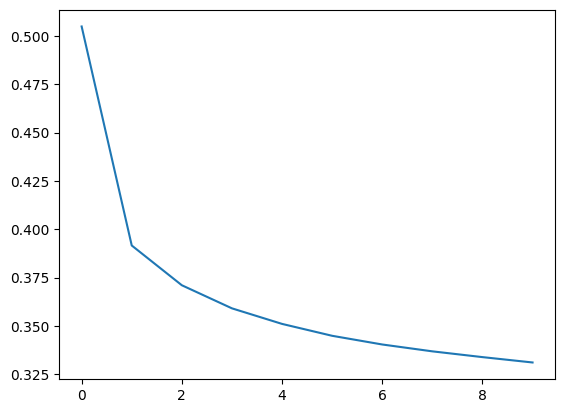

In [ ]:
plt.plot(epoch_training_loss)

In [ ]:
with torch.no_grad():
  correct = 0
  for x,y in test_loader:
    x = x.to(device)
    y = y.numpy()

    out = model(x).cpu().numpy()

    preds = np.argmax(out, axis=-1)
    # print(preds)
    # print(y)

    correct += np.sum(preds==y)
    # break

accuracy = correct/len(test_data) * 100
print(accuracy)

86.30537382976712


In [ ]:
np.sum(preds == y)

30

**Even after only 2 epochs CNN gave a higher accuracy than the NN(86.2%). Unfortunately we couldn't notice any major impovement in the accuracy of CNN with different parameters(learning rate, number of epochs etc)**

**Four Convolutional Layers**

In [ ]:
class OurCNN(nn.Module):
  def __init__(self):
    super().__init__()

    # out_channels= # of feature maps to be learned or # of features
    self.conv_layer_1 = nn.Conv2d(in_channels=1, out_channels=140, kernel_size=3, padding=1)
    self.conv_layer_2 = nn.Conv2d(in_channels=140, out_channels=120, kernel_size=3, padding=1)
    self.conv_layer_3 = nn.Conv2d(in_channels=120, out_channels=120, kernel_size=3, padding=1)
    self.conv_layer_4 = nn.Conv2d(in_channels=120, out_channels=64, kernel_size=3, padding=1)

    # Polling layer conceptually used to reduce spatial dimensions of feature maps and introduce translational variance
    self.pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

    self.linear_layer_1 = nn.Linear(in_features=64*3*3, out_features=100)
    self.linear_layer_2 = nn.Linear(in_features=100, out_features=62)

  def forward(self, x): # x -> (B, C, H, W)
    x = self.pool_layer(nn.functional.relu(self.conv_layer_1(x)))
    x = self.pool_layer(nn.functional.relu(self.conv_layer_2(x)))
    x = self.pool_layer(nn.functional.relu(self.conv_layer_3(x)))
    x = self.pool_layer(nn.functional.relu(self.conv_layer_4(x)))

    x = x.flatten(start_dim=1)

    x = nn.functional.relu(self.linear_layer_1(x))
    x = self.linear_layer_2(x)
    # x = torch.softmax(x, dim=-1)

    return x

NameError: name 'nn' is not defined

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = OurCNN().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10

epoch_training_loss = []

for i in range(num_epochs):
  batch_losses = 0
  for x,y in train_loader:
    x = x.to(device)
    y = y.to(device)

    out = model(x)

    loss = criterion(out, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batch_losses += loss.item()

  epoch_training_loss.append(batch_losses/len(train_loader))
  print(f"Epoch: {i}, training_loss: {epoch_training_loss[-1]}")